In [5]:
import libpy_tutorial

# libpy Tutorial

## Simple Scalar Functions

In [2]:
from libpy_tutorial.bind_scalar_function import (
    bool_scalar, 
    monte_carlo_pi,
)

A simple scalar function:

In [3]:
bool_scalar(False)

True

Something a bit more complicated. Let's estimate `pi` using monte carlo simulation:

In [11]:
monte_carlo_pi(10_000_000)

3.1421384811401367

## Working With Arrays

And more complicated functions

In [5]:
import numpy as np
from libpy_tutorial.arrays import (
    simple_sum,
    is_prime,
)

In [6]:
some_numbers = np.arange(20000)

In [7]:
simple_sum(some_numbers)

199990000

In [8]:
zz = is_prime(values=some_numbers)

In [9]:
zz[:100]

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False])

In [10]:
some_numbers[:100]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## N Dimensional Arrays

Let's sharpen an image



In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
img_file = Path("original.png")

In [2]:
img = Image.open(img_file)

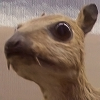

In [3]:
img

In [4]:
pixels = np.array(img)

In [5]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) # already normalized

In [6]:
from libpy_tutorial.ndarrays import apply_kernel

In [7]:
%%timeit
res = apply_kernel(pixels.astype('int64'), kernel)

875 µs ± 295 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
res = res.clip(0, 255)
out = np.reshape(res, pixels.shape, 'F')

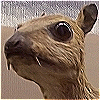

In [31]:
Image.fromarray(out.astype('uint8'))

In [33]:
from PIL import ImageFilter

In [36]:
%%timeit
img.filter(ImageFilter.SHARPEN)

196 µs ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Exceptions 

We can throw exceptions in `c++` that will then be dealt with in python.

In [1]:
from libpy_tutorial.exceptions import (
    raise_a_value_error,
    throw_value_error
)

Two types of patterns:

1. `py::raise` a  Python exception and then `throw` it with `py::exception{}`
2. Construct and throw an exception at the same time

In [3]:
raise_a_value_error()

ValueError: failed to do something because: wargl bargle

In [5]:
throw_value_error(4)

ValueError: You passed 4 and this is the exception

Use `raise_from_cxx_exception` to raise a python exception given a c++ exception 

# Creating Classes



In [1]:
from libpy_tutorial.autoclass import SampleClass

In [2]:
sample = SampleClass(5, 10)

In [3]:
SampleClass?

Init signature: SampleClass(self, /, *args, **kwargs)
Docstring:      Small docstring for my class
Type:           type
Subclasses:     


In [4]:
sample.b()

10.0

In [5]:
sample.sum()

15.0

In [6]:
sample(100, 1)

111.0

In [7]:
other_sample = SampleClass(500, 10)

In [8]:
sample + other_sample

505

In [9]:
sample > other_sample

False

In [10]:
-sample

-5

In [11]:
int(sample)

5